# Churn Analysis

Customer Churn is when customers leave a service in a given period of time, what is bad for business. This work has as objective to build a machine learning model to predict which customers will leave the service and the dataset used is the Telco Customer Churn, hosted at Kaggle. An Exploratory Data Analysis is made to a better understand the data.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
df = pd.read_excel('customer_churn.xlsx')
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   customerID        7043 non-null   object
 1   gender            7043 non-null   object
 2   SeniorCitizen     7043 non-null   int64 
 3   Partner           7043 non-null   object
 4   Dependents        7043 non-null   object
 5   tenure            7043 non-null   int64 
 6   PhoneService      7043 non-null   object
 7   MultipleLines     7043 non-null   object
 8   InternetService   7043 non-null   object
 9   OnlineSecurity    7043 non-null   object
 10  OnlineBackup      7043 non-null   object
 11  DeviceProtection  7043 non-null   object
 12  TechSupport       7043 non-null   object
 13  StreamingTV       7043 non-null   object
 14  StreamingMovies   7043 non-null   object
 15  Contract          7043 non-null   object
 16  PaperlessBilling  7043 non-null   object
 17  PaymentMethod 

In [4]:
df.describe()

,SeniorCitizen,tenure
count,7043.000000,7043.000000
mean,0.162147,32.371149
std,0.368612,24.559481
min,0.000000,0.000000
25%,0.000000,9.000000
50%,0.000000,29.000000
75%,0.000000,55.000000
max,1.000000,72.000000


In [5]:
df.loc[df.Churn == 'No','Churn'] = 0
df.loc[df.Churn == 'Yes', 'Churn'] = 1

In [6]:
df['Churn']

0       0
1       0
2       1
3       0
4       1
       ..
7038    0
7039    0
7040    0
7041    1
7042    0
Name: Churn, Length: 7043, dtype: object

In [7]:
dataset = df['Churn'].value_counts()
dataset

0    5174
1    1869
Name: Churn, dtype: int64

In [8]:
df1 = pd.read_excel('customer_churn.xlsx')
df1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.3,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.7,151.65,Yes


In [9]:
char_cols = df.dtypes.pipe(lambda x: x[x == 'object']).index
for c in char_cols:
    df[c] = pd.factorize(df[c])[0]
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,34,1,1,0,1,...,1,0,0,0,1,1,1,1,1,0
2,2,1,0,1,0,2,1,1,0,1,...,0,0,0,0,0,0,1,2,2,1
3,3,1,0,1,0,45,0,0,0,1,...,1,1,0,0,1,1,2,3,3,0
4,4,0,0,1,0,2,1,1,1,0,...,0,0,0,0,0,0,0,4,4,1


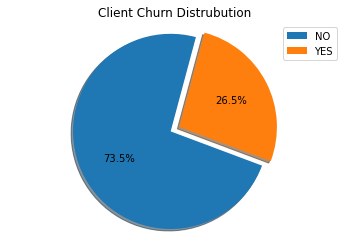

In [10]:
sizes = [5174,1869]
labels = 'NO', 'YES'
explode = (0, 0.1)
fig1, ax1 = plt.subplots()
ax1.pie(sizes, explode=explode, autopct='%1.1f%%', shadow=True, startangle=75)
ax1.axis('equal')
ax1.set_title("Client Churn Distrubution")
ax1.legend(labels)

plt.show()

In [11]:
df.groupby('gender').Churn.mean()

gender
0    0.269209
1    0.261603
Name: Churn, dtype: float64

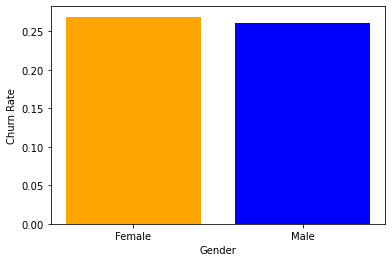

In [12]:
# Create a dataset
churn_mean = [0.269209, 0.261603]
gender = ('Female', 'Male')
x_pos = np.arange(len(churn_mean)) #return numpy array

# Create bars with different colors
plt.bar(x_pos, churn_mean, color=['orange', 'blue'])

# Create names on the x-axis
plt.xticks(x_pos, gender)

# Add title and axis names
plt.xlabel('Gender')
plt.ylabel('Churn Rate')

plt.show()

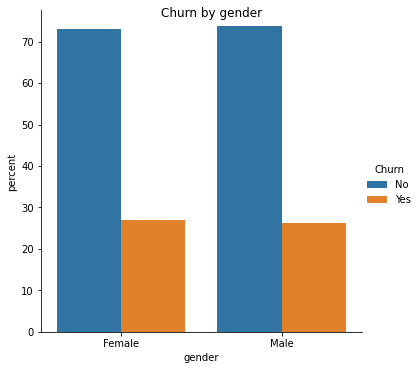

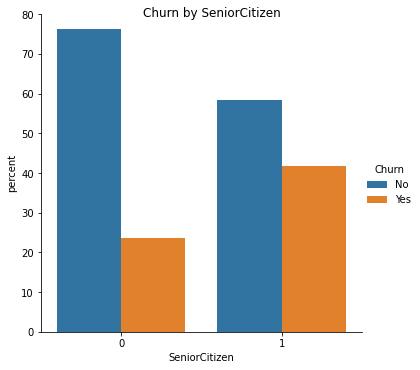

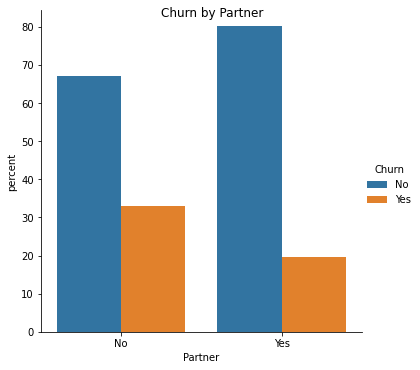

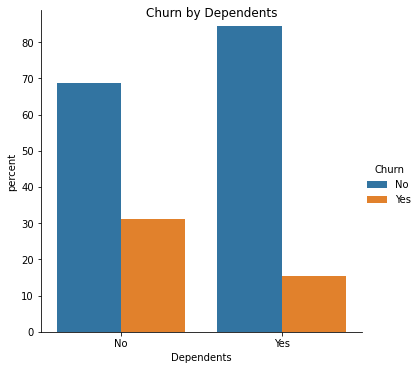

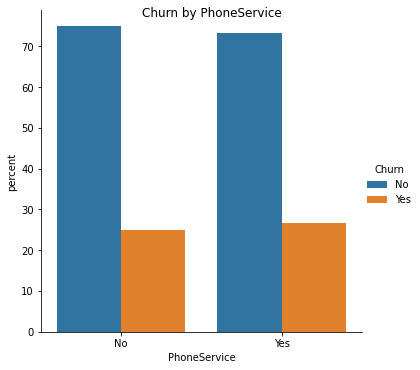

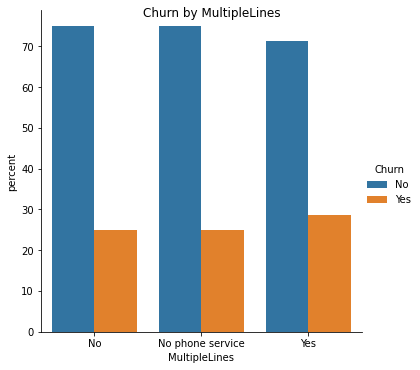

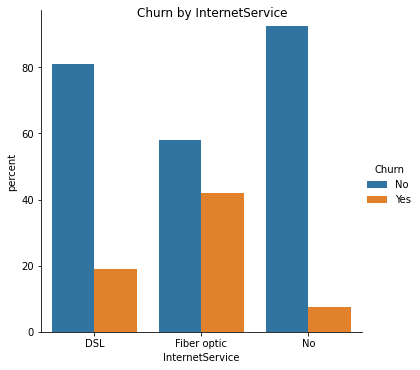

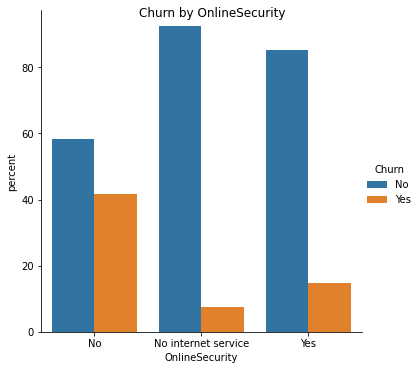

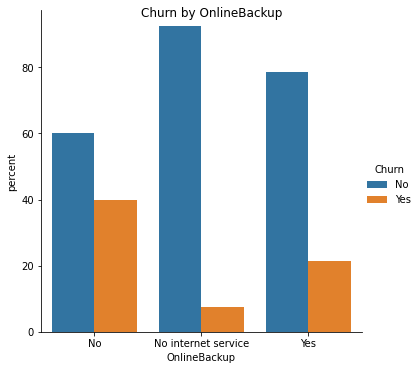

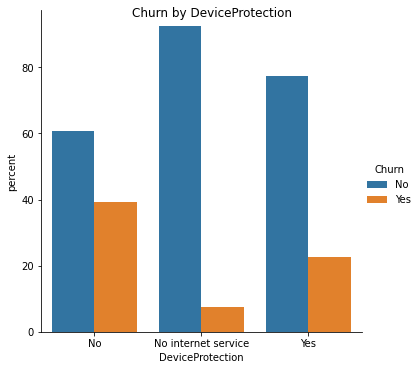

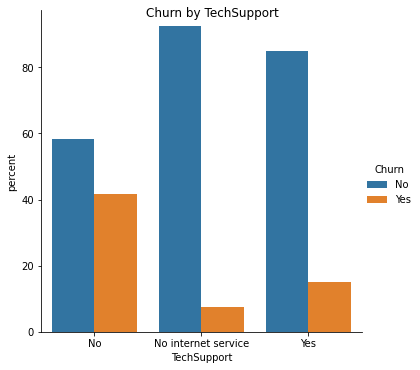

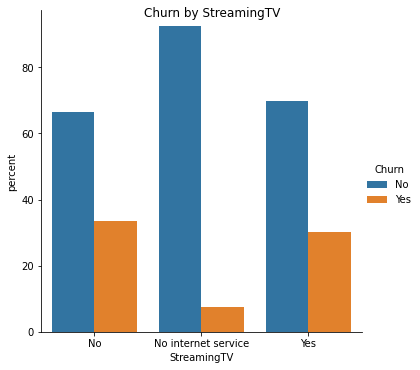

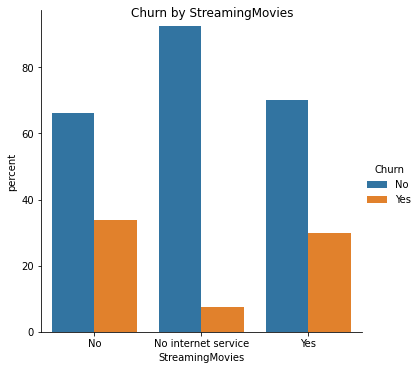

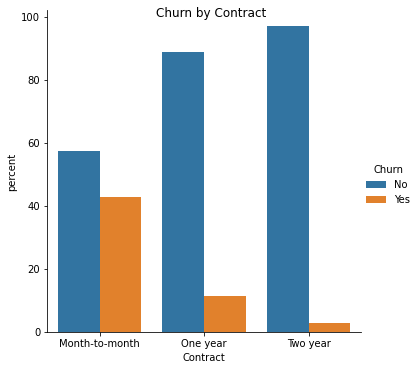

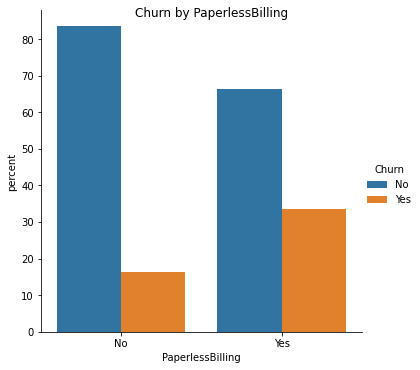

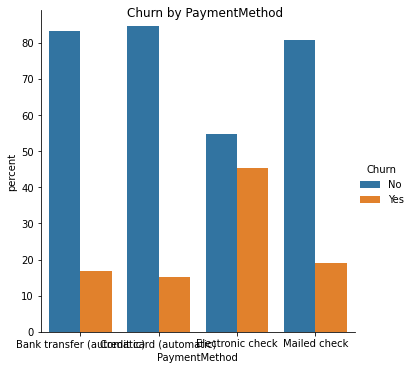

In [13]:
catvars = df1.columns.tolist() #returns list of values(str, float, time)
catvars = [e for e in catvars if e not in ('TotalCharges', 'MonthlyCharges', 
                                           'tenure', 'customerID', 'Churn')]

y = 'Churn'
for x in catvars:
    plot = df1.groupby(x)[y]\
        .value_counts(normalize=True).mul(100)\
        .rename('percent').reset_index()\
        .pipe((sns.catplot,'data'), x=x, y='percent', hue=y, kind='bar')
    plot.fig.suptitle("Churn by " + x)
    plot

<AxesSubplot:xlabel='tenure', ylabel='Count'>

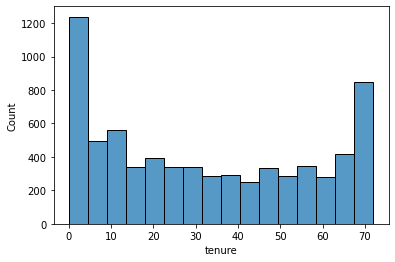

In [14]:
# Tenure(by month)
sns.histplot(df1.tenure)

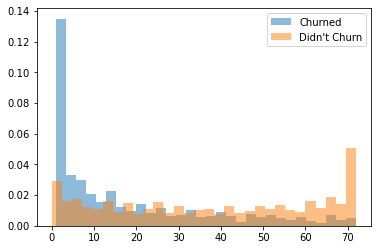

In [15]:
# Churn by tenure 
bins = 30
plt.hist(df1[df1.Churn == 'Yes'].tenure, 
         bins, alpha=0.5, density=True, label='Churned')
plt.hist(df1[df1.Churn == 'No'].tenure, 
         bins, alpha=0.5, density=True, label="Didn't Churn")
plt.legend(loc='upper right')
plt.show()

In [16]:
churners_number = len(df[df['Churn'] == 1])
print("Number of churners", churners_number)

churners = (df[df['Churn'] == 1])

non_churners = df[df['Churn'] == 0].sample(n=churners_number)
print("Number of non-churners", len(non_churners))
df3 = churners.append(non_churners)

Number of churners 1869
Number of non-churners 1869


In [17]:
def show_correlations(df, show_chart = True):
    fig = plt.figure(figsize = (20,10))
    corr = df.corr()
    if show_chart == True:
        sns.heatmap(corr, 
                    xticklabels=corr.columns.values,
                    yticklabels=corr.columns.values,
                    annot=True)
    return corr

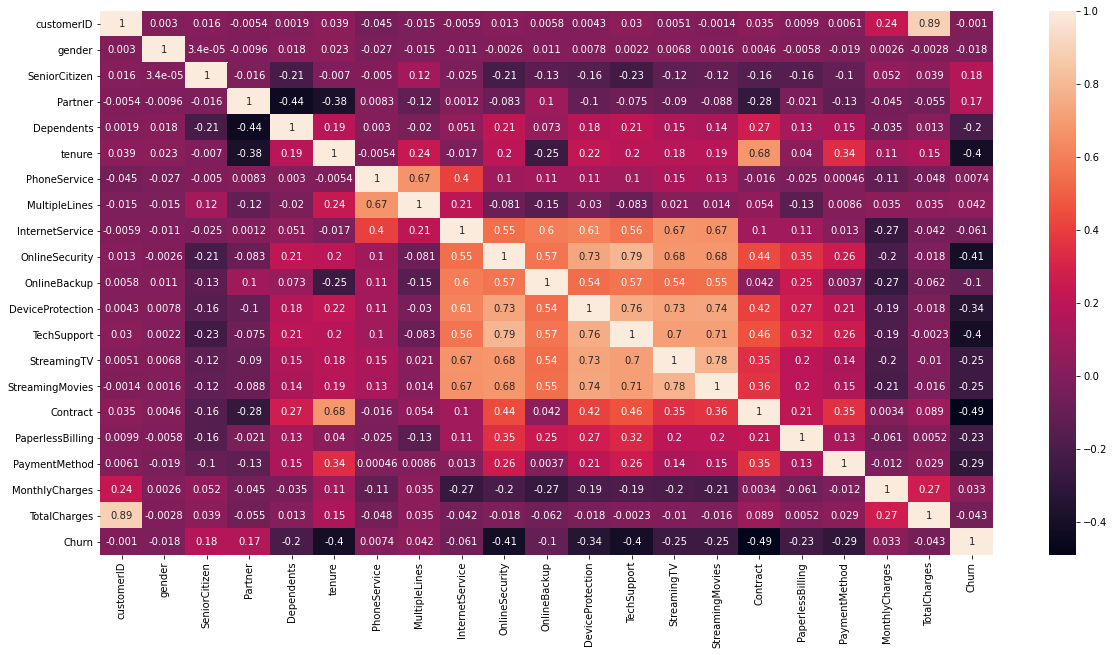

In [18]:
correlation_df = show_correlations(df3,show_chart=True)

In [19]:
# Define the target variable (dependent variable)
y = df.Churn 
df = df.drop(['Churn'], axis= 1)

In [20]:
df.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges
0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,1,0,34,1,1,0,1,1,1,0,0,0,1,1,1,1,1
2,2,1,0,1,0,2,1,1,0,1,0,0,0,0,0,0,0,1,2,2
3,3,1,0,1,0,45,0,0,0,1,1,1,1,0,0,1,1,2,3,3
4,4,0,0,1,0,2,1,1,1,0,1,0,0,0,0,0,0,0,4,4


In [21]:
# Splitting training and testing data
from sklearn.model_selection import train_test_split  
X_train, X_test, y_train, y_test = train_test_split(df, y, test_size = 0.20)

In [23]:
# Applying Support Vector Machine algorithm
from sklearn.svm import SVC  
svclassifier = SVC(kernel='linear', degree=8)  
svclassifier.fit(X_train, y_train)

SVC(degree=8, kernel='linear')

In [24]:
# Predicting part, applying the model to predict
y_pred = svclassifier.predict(X_test) 

In [25]:
# Evaluating model performance
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import accuracy_score
print(confusion_matrix(y_test,y_pred))  
print(classification_report(y_test,y_pred))
print("SVM Accuracy Score: ", accuracy_score(y_pred, y_test)*100)

[[992  86]
 [187 144]]
              precision    recall  f1-score   support

           0       0.84      0.92      0.88      1078
           1       0.63      0.44      0.51       331

    accuracy                           0.81      1409
   macro avg       0.73      0.68      0.70      1409
weighted avg       0.79      0.81      0.79      1409

SVM Accuracy Score:  80.62455642299503
